In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [16]:
path1 = "Fitdata/dailyActivity_merged.csv"

In [17]:
dfactivity  = pd.read_csv(path1)


In [18]:
dfactivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [19]:
#Calculate total # of individuals in study

unique_ID = len(dfactivity["Id"].unique())
print(unique_ID)

33


In [20]:
UserIDs = dfactivity["Id"].unique()

In [21]:
dfactivity.loc[dfactivity["Id"] == 1503960366, ["TotalDistance", "Calories"]]

,TotalDistance,Calories
0,8.50,1985
1,6.97,1797
2,6.74,1776
3,6.28,1745
4,8.16,1863
5,6.48,1728
6,8.59,1921
7,9.88,2035
8,6.68,1786
9,6.34,1775


In [22]:
dfactivity["Id"] == 1503960366

0       True
1       True
2       True
3       True
4       True
       ...  
935    False
936    False
937    False
938    False
939    False
Name: Id, Length: 940, dtype: bool

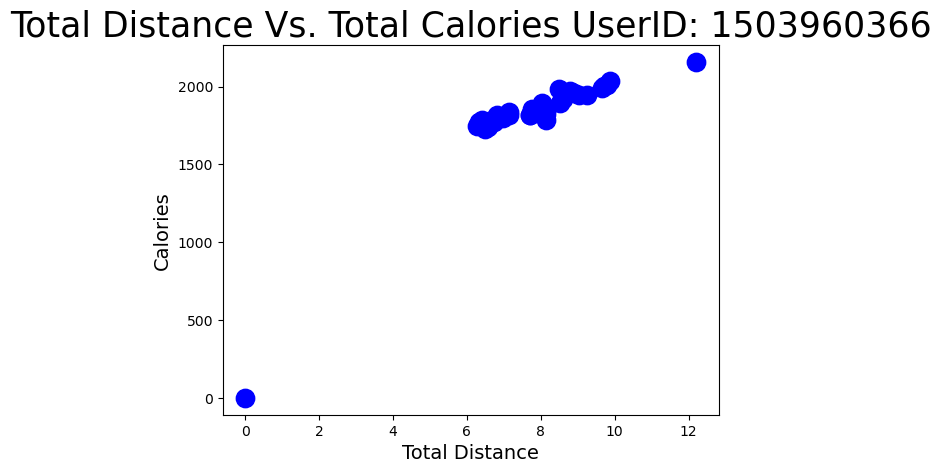

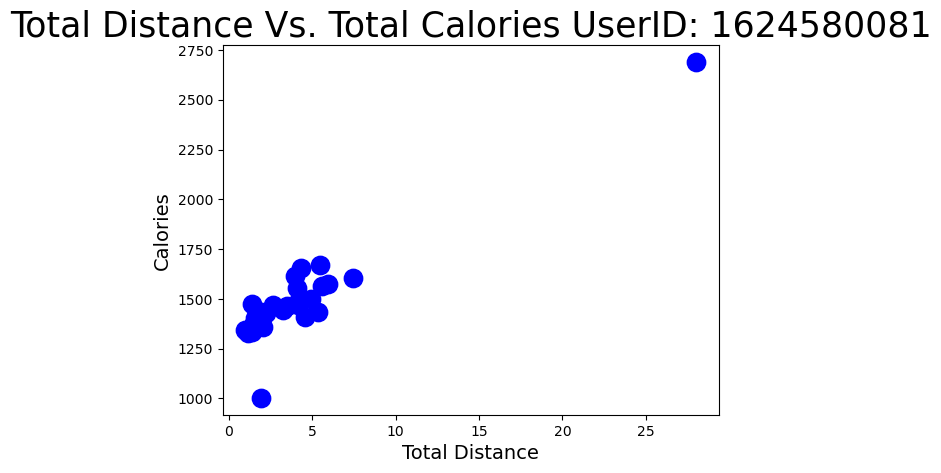

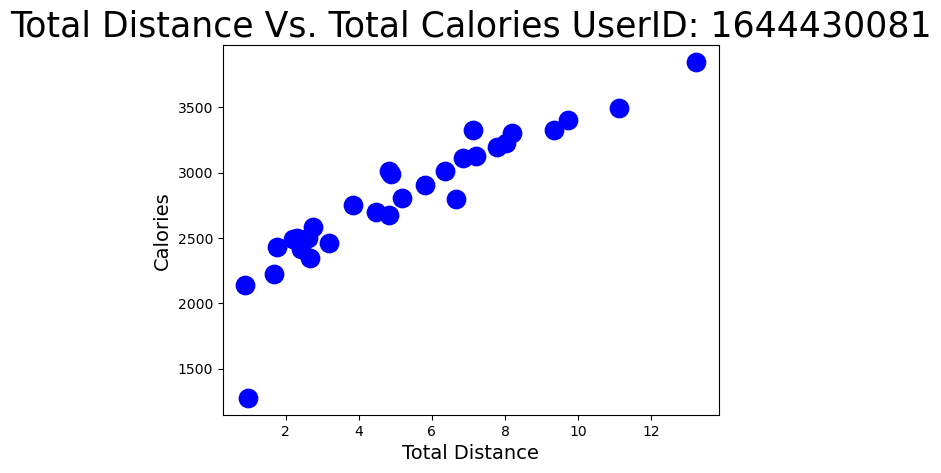

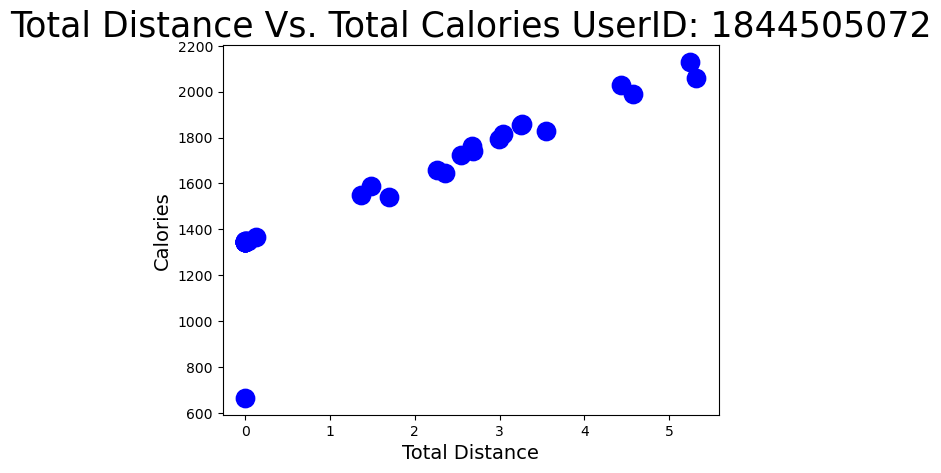

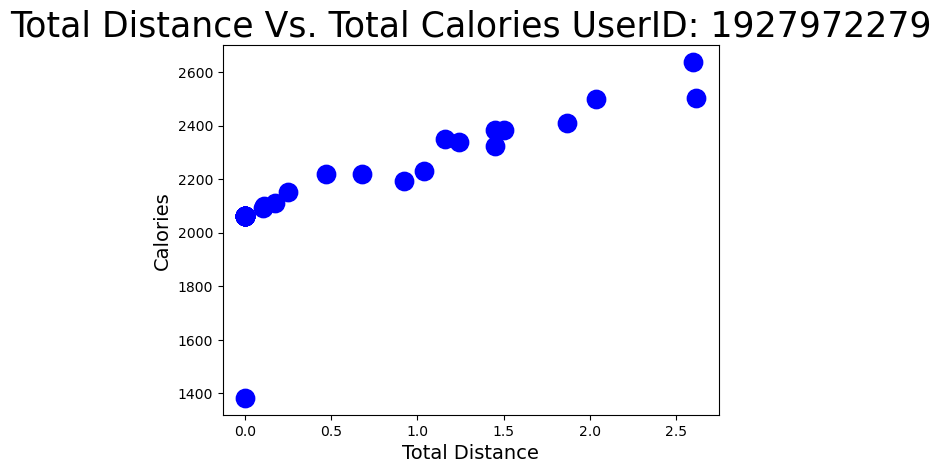

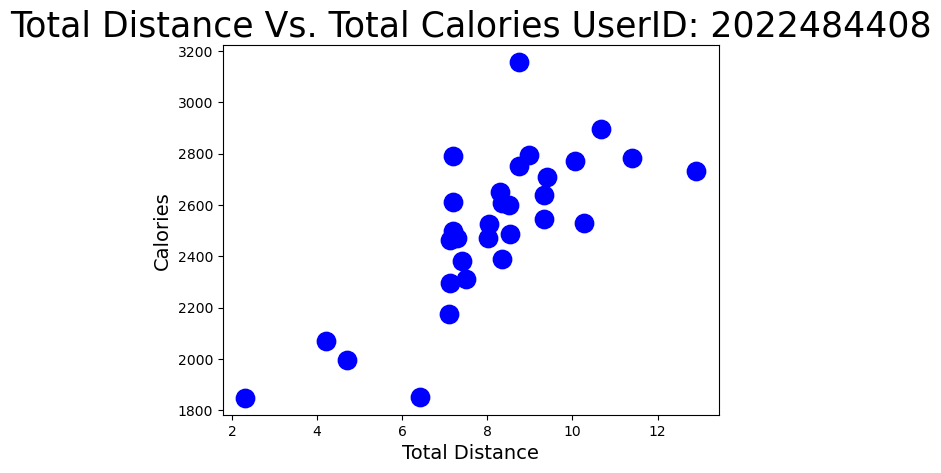

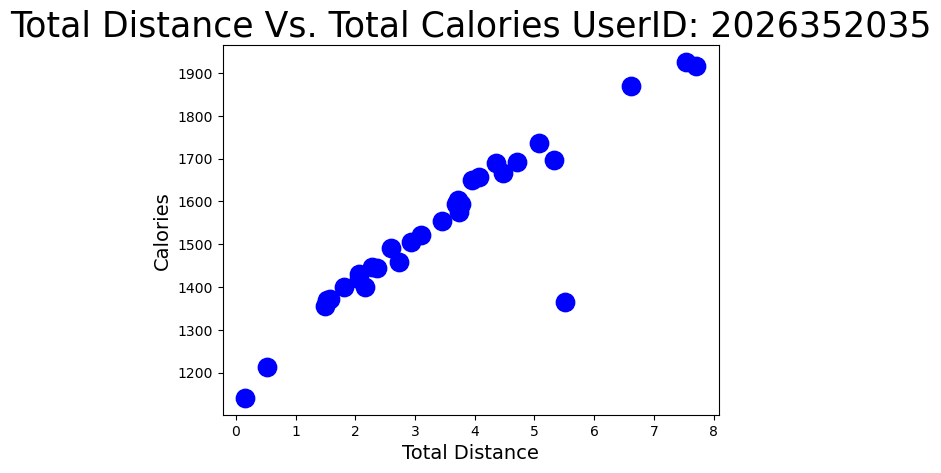

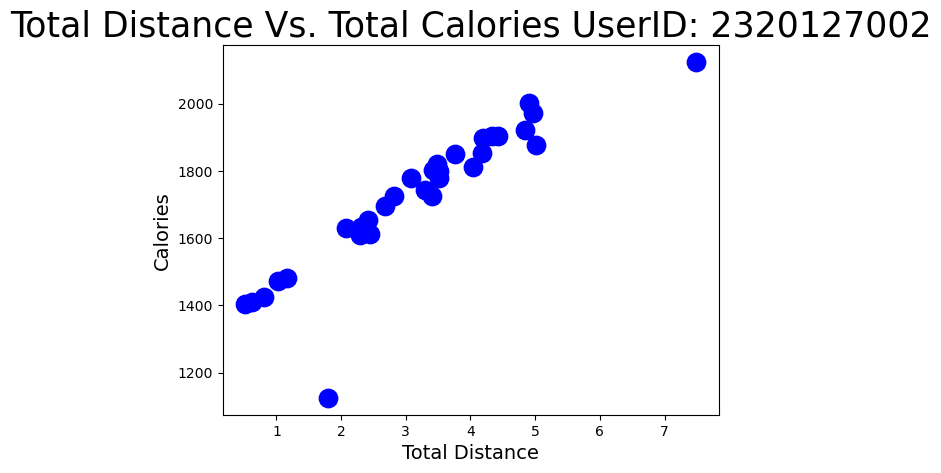

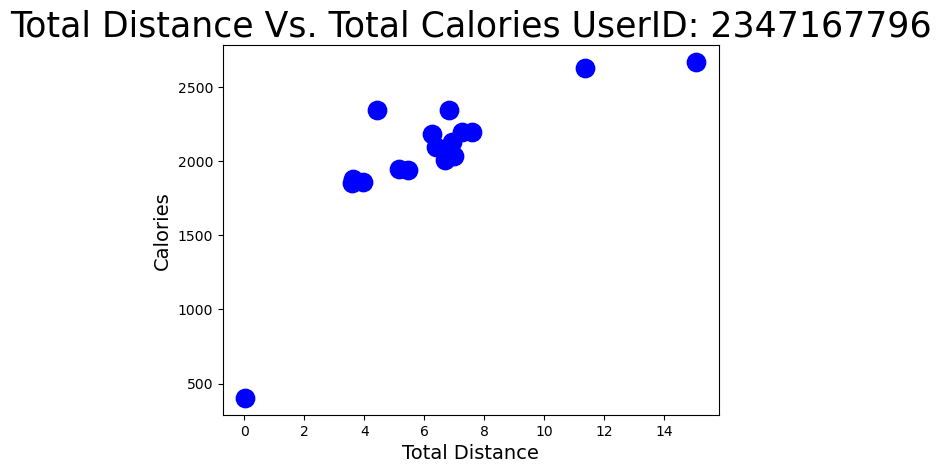

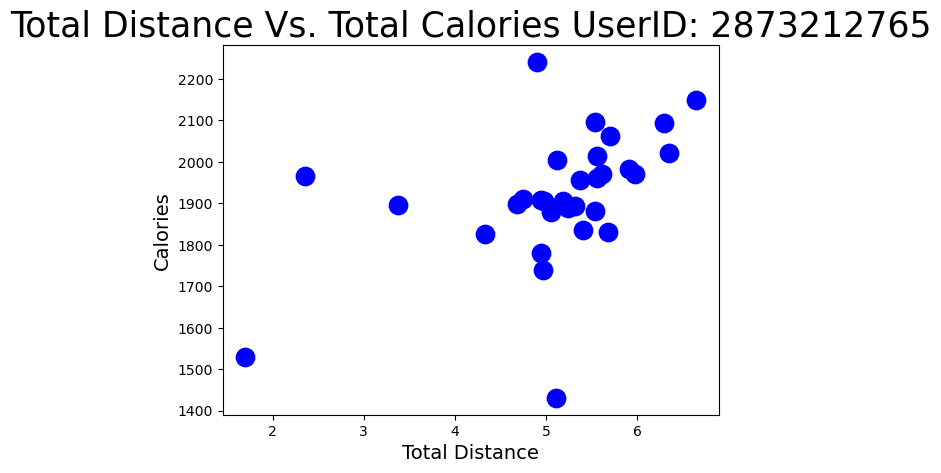

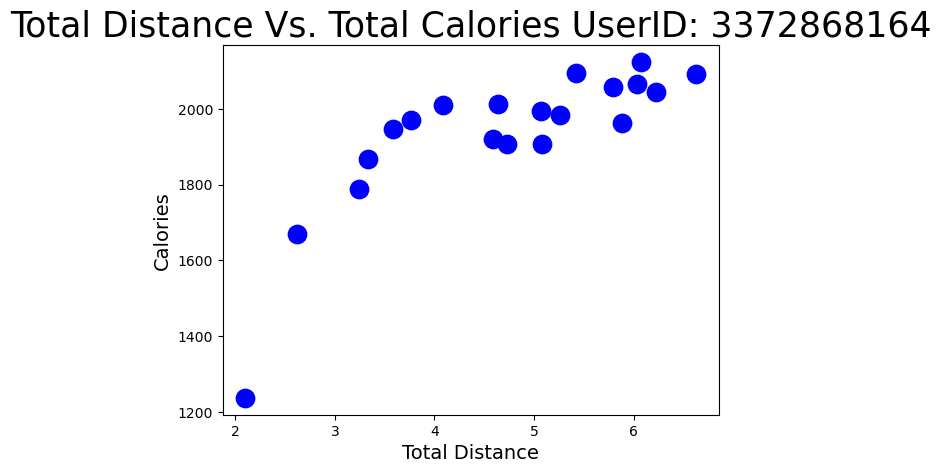

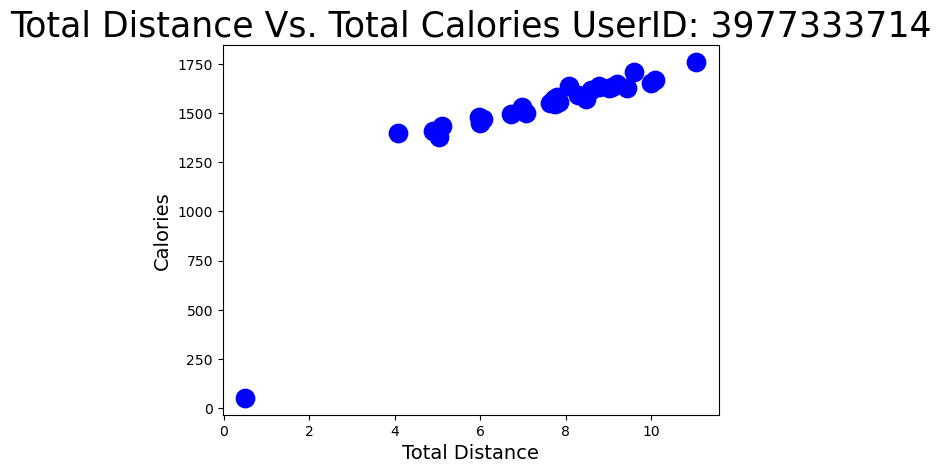

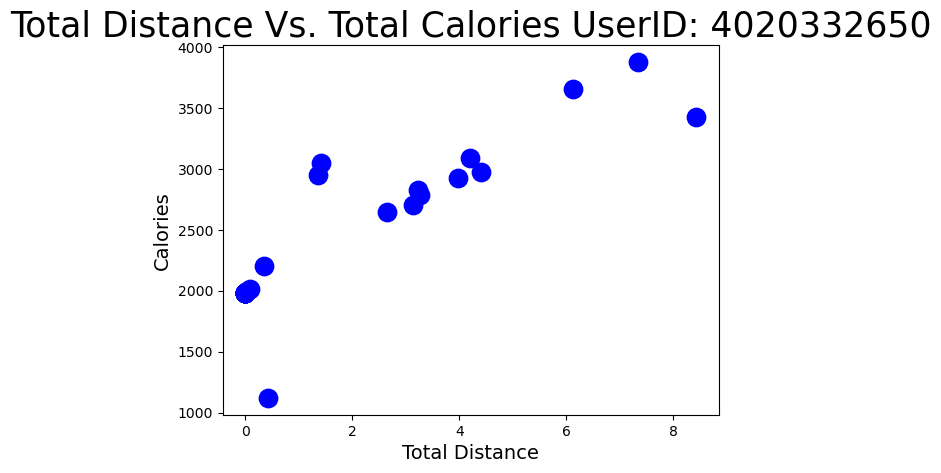

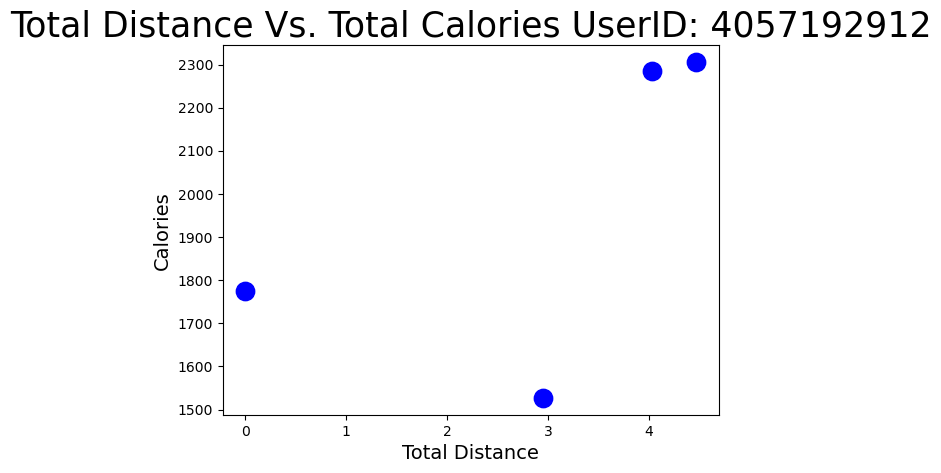

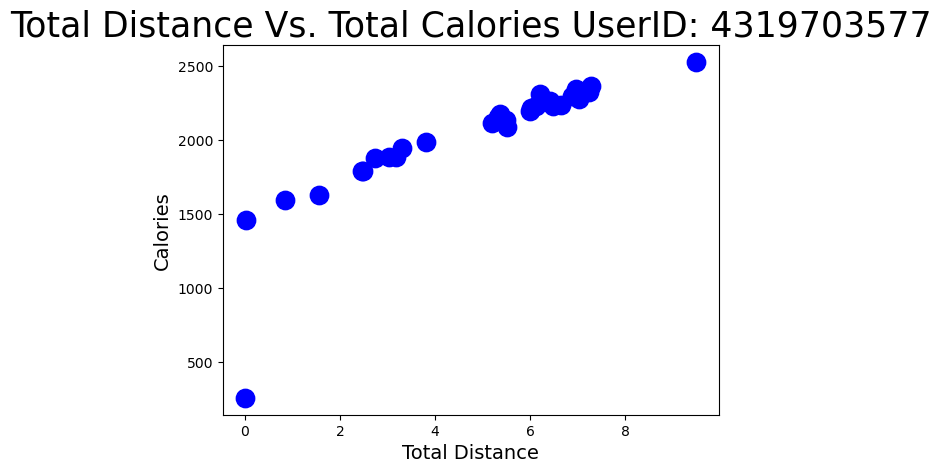

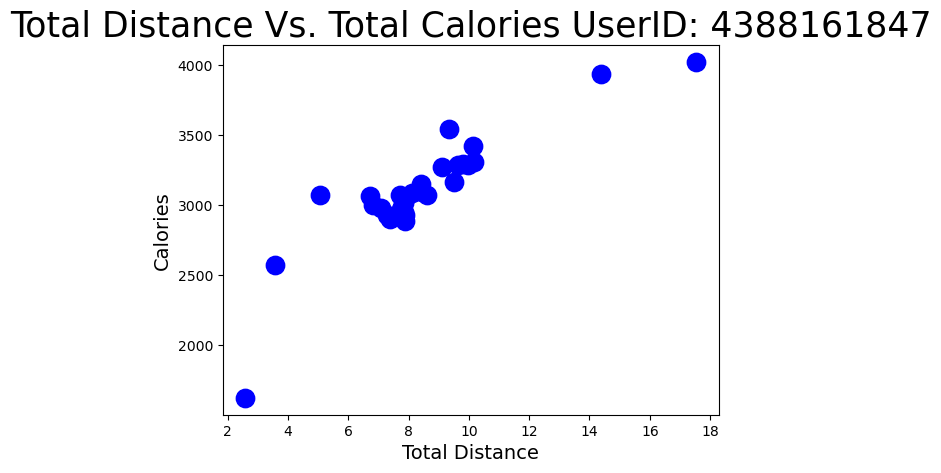

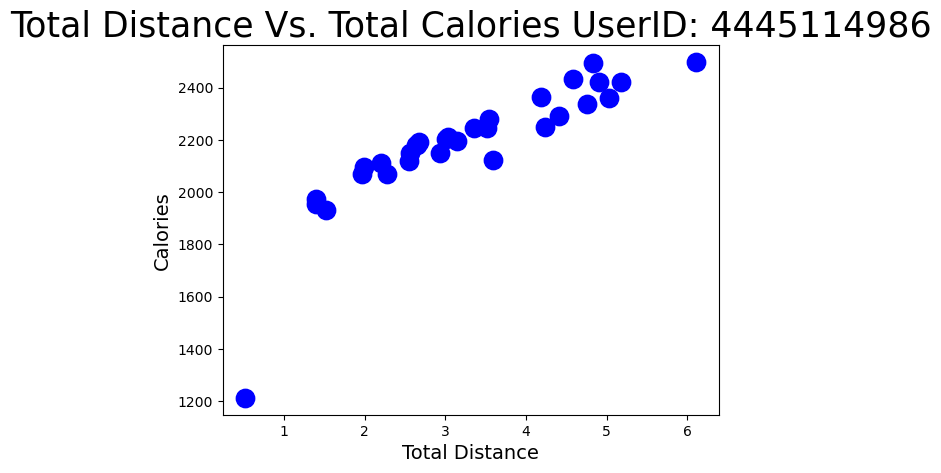

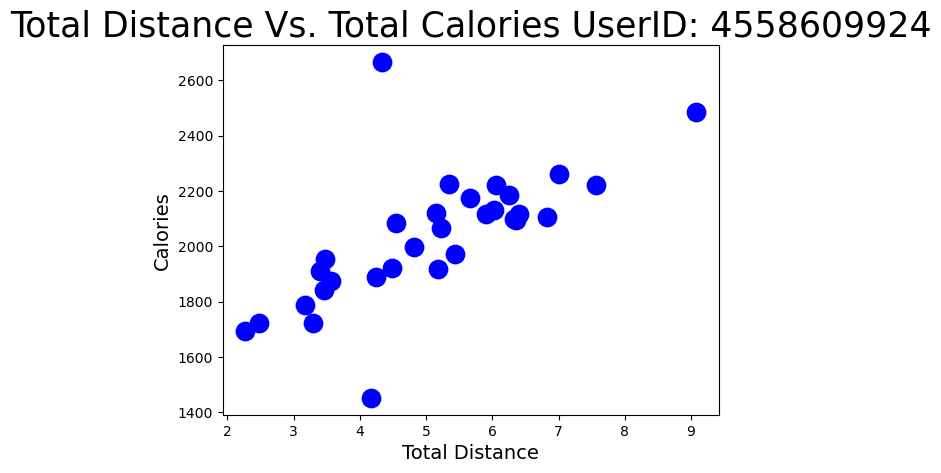

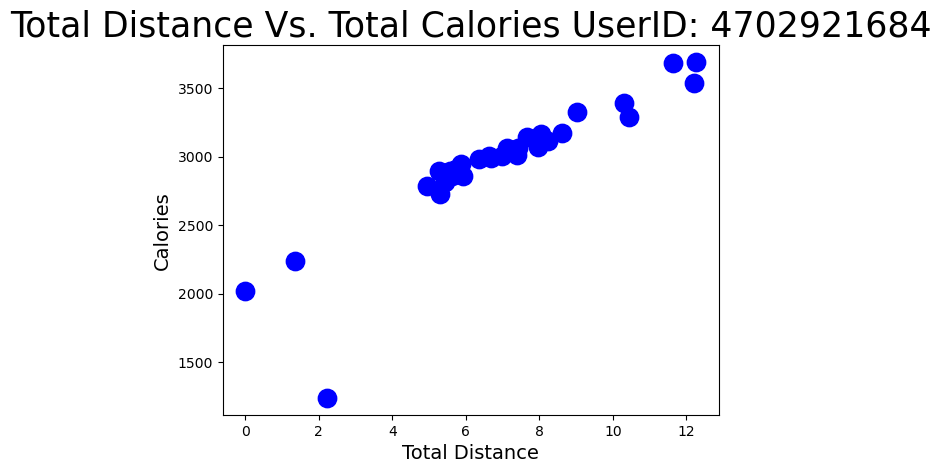

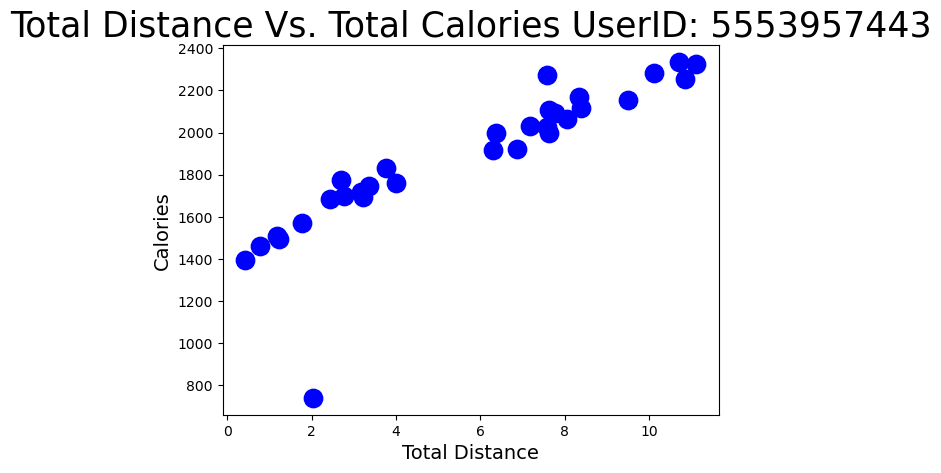

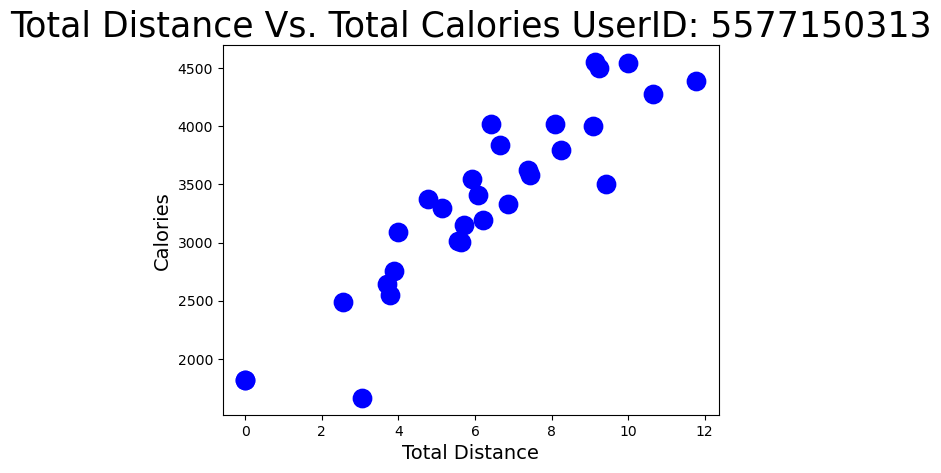

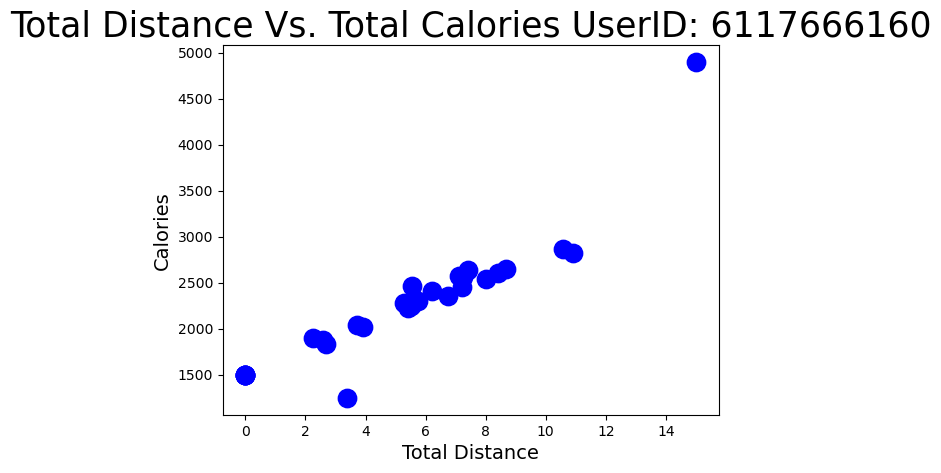

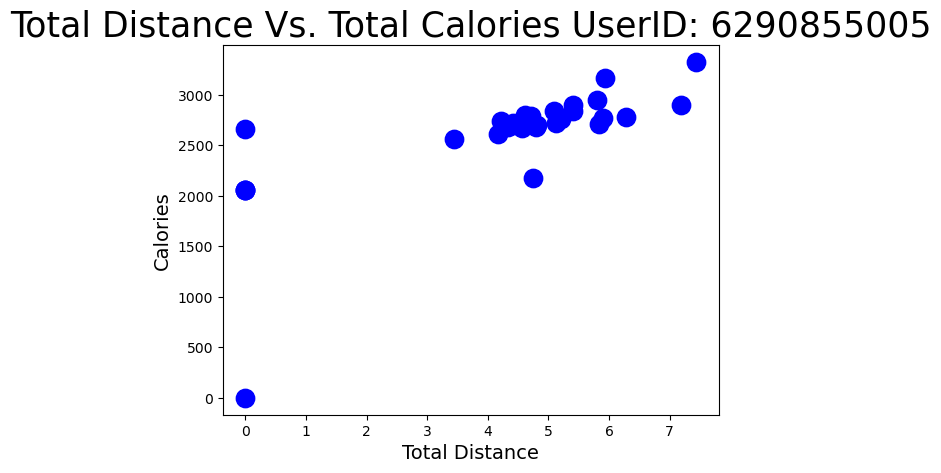

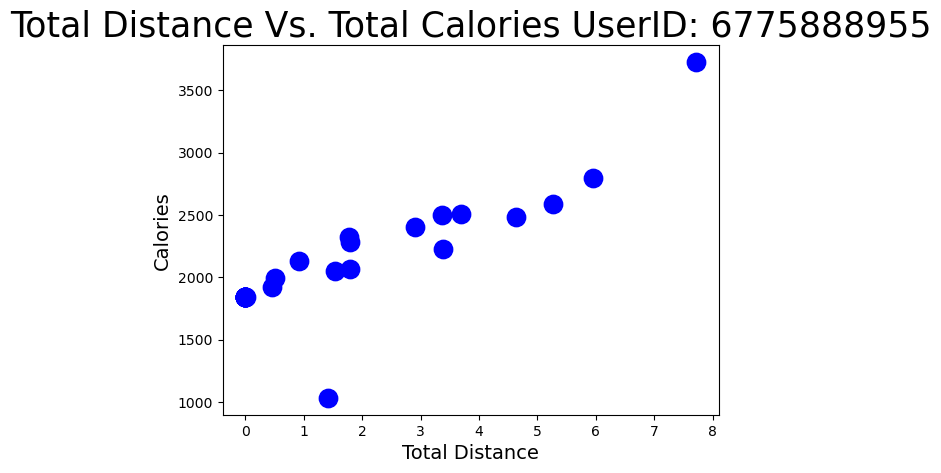

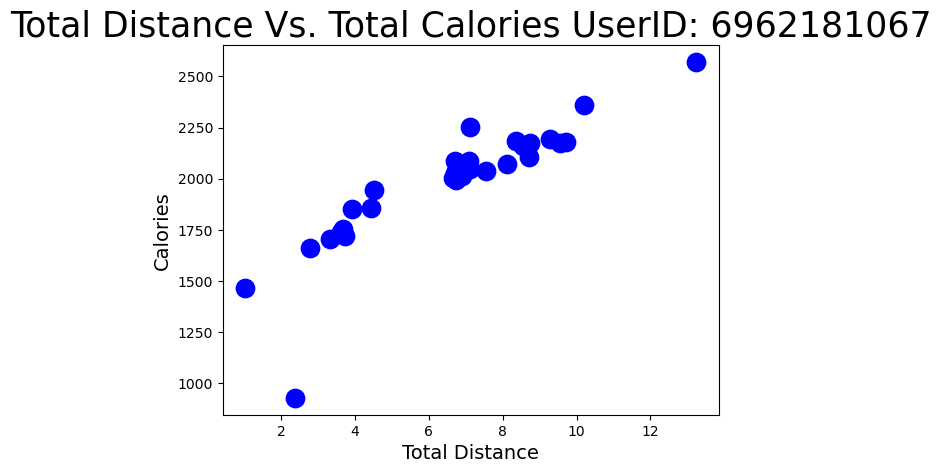

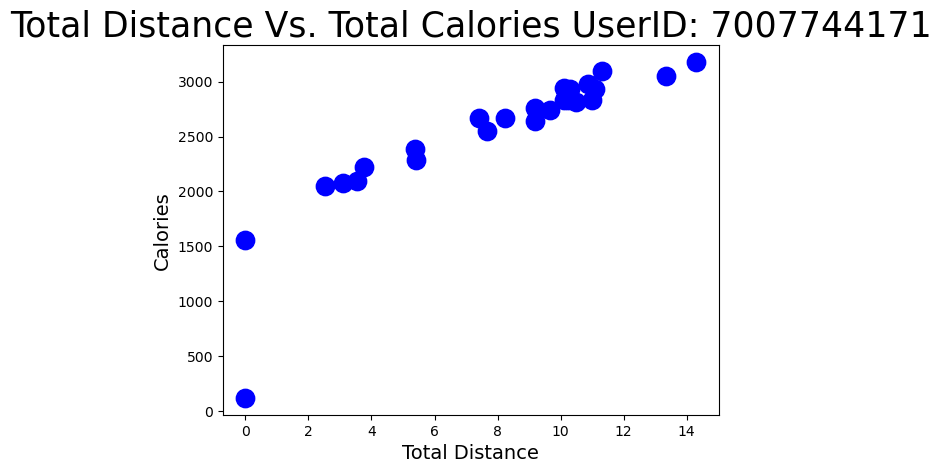

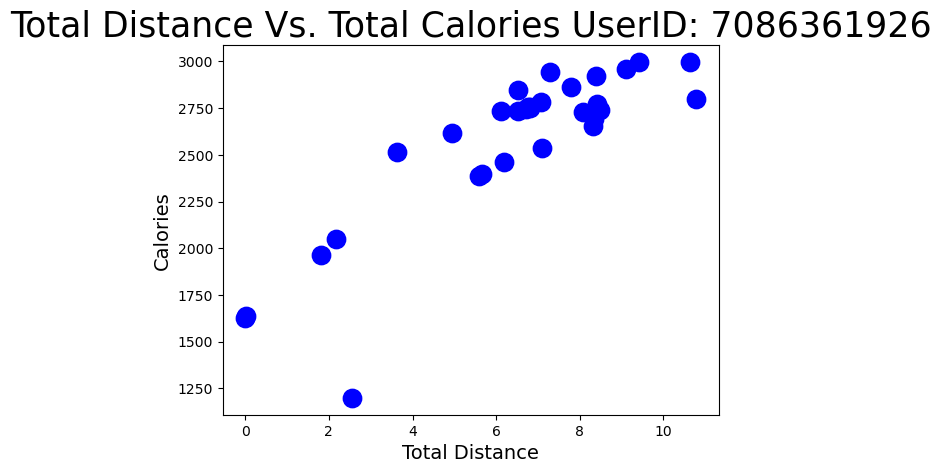

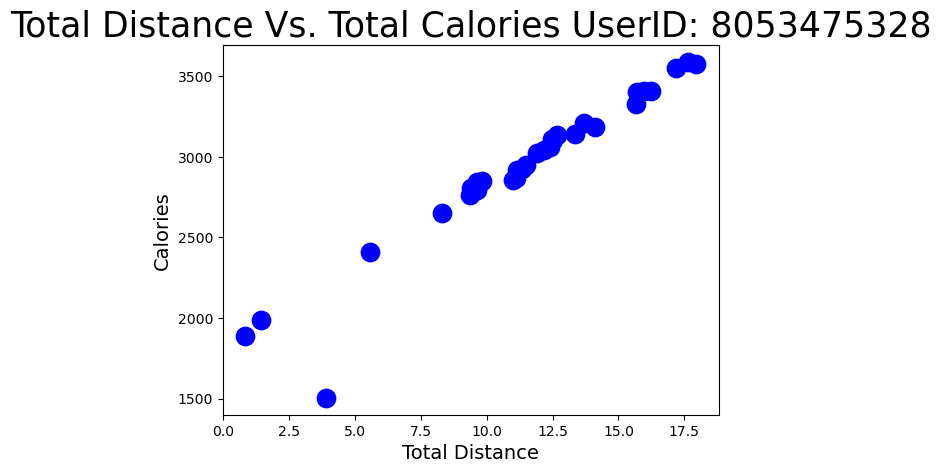

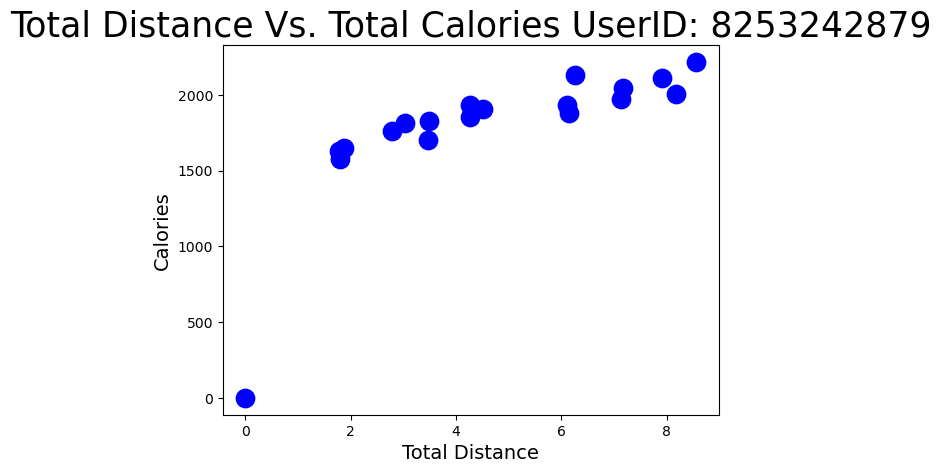

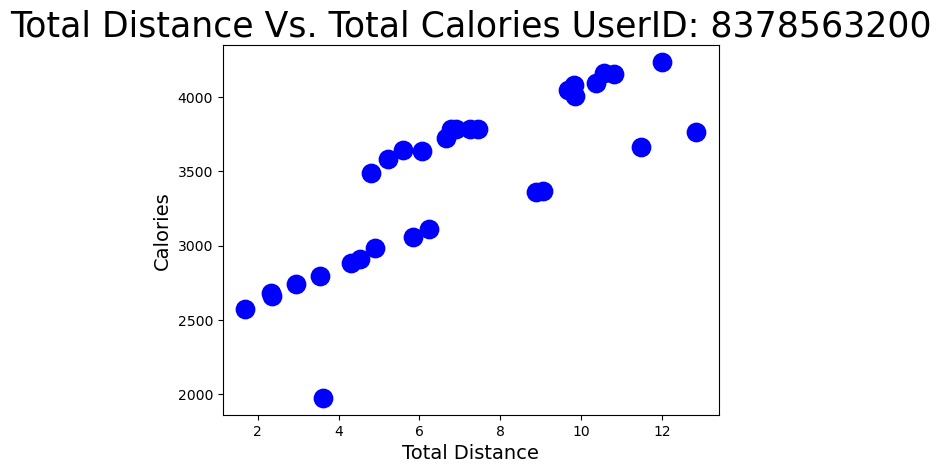

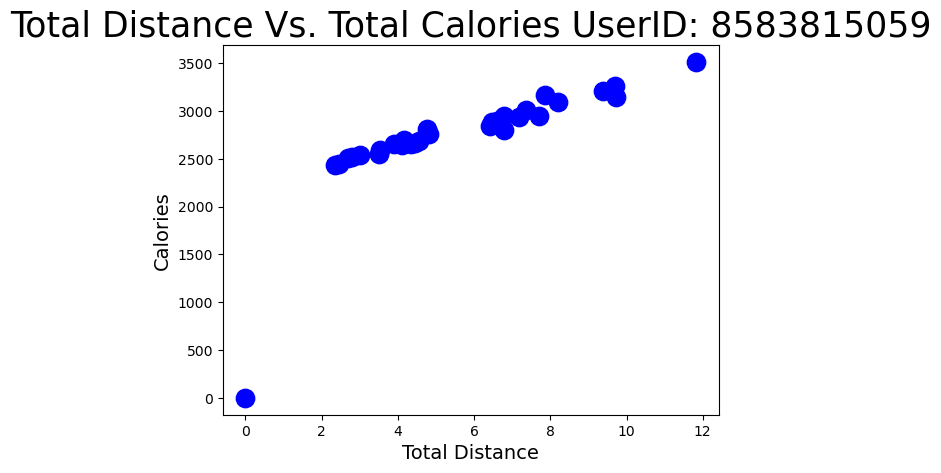

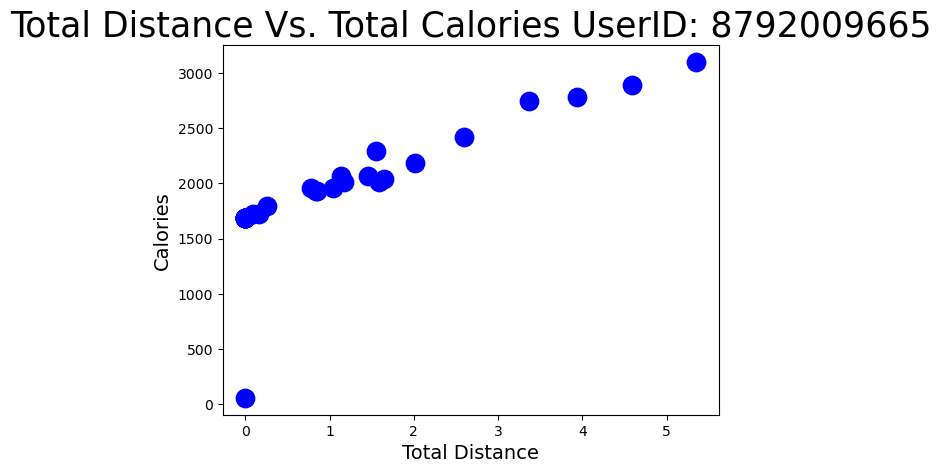

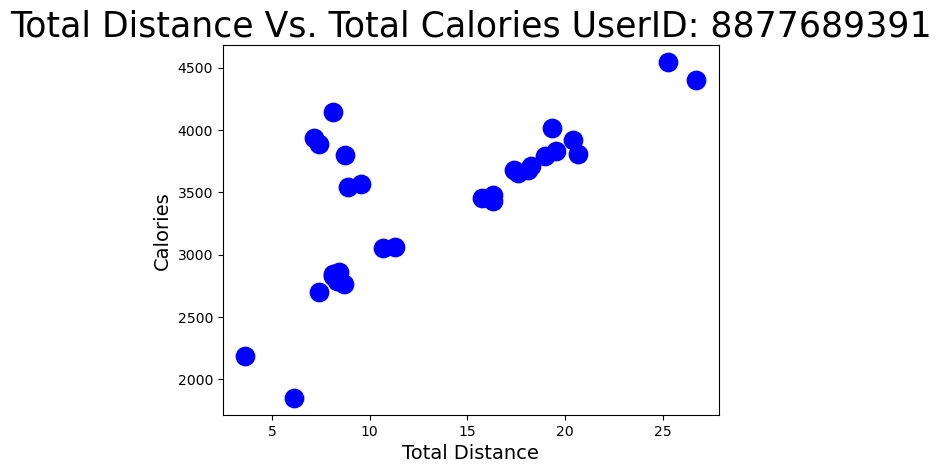

In [23]:
for ID in UserIDs:
    userdf = dfactivity.loc[dfactivity["Id"] == ID, ["TotalDistance", "Calories"]]
    marker_size=15
    plt.scatter(userdf['TotalDistance'],userdf['Calories'],s=175, color="blue")
    plt.title(f'Total Distance Vs. Total Calories UserID: {ID}',fontsize =25)
    plt.xlabel('Total Distance',fontsize =14)
    plt.ylabel('Calories',fontsize =14)

    plt.show()

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime,date
import random

In [25]:
steps_path = "Fitdata/dailySteps_merged.csv"
sleep_path = "Fitdata/sleepDay_merged.csv"

In [26]:
steps_data = pd.read_csv(steps_path)
sleep_data = pd.read_csv(sleep_path)

In [27]:
sleep_data

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [28]:
# defining quality of sleep and attaching it to the dataframe
sleep_data["Quality of sleep"] = sleep_data["TotalMinutesAsleep"] / sleep_data["TotalTimeInBed"]

#formatting dates 
sleep_data['SleepDay'] = sleep_data['SleepDay'].astype("datetime64")
steps_data['ActivityDay'] = steps_data['ActivityDay'].astype("datetime64")

sleep_data = sleep_data.rename(columns={'SleepDay': 'Day'})
steps_data = steps_data.rename(columns={'ActivityDay': 'Day'})

In [29]:
# merge
sleep_steps_df = pd.merge(steps_data, sleep_data, how="left", on=['Id','Day'])

In [30]:
# clean merged dataframe
clean_df = sleep_steps_df.drop(columns=['TotalMinutesAsleep', 'TotalTimeInBed','TotalSleepRecords'])
clean_df = clean_df.dropna()
clean_df

,Id,Day,StepTotal,Quality of sleep
0,1503960366,2016-04-12,13162,0.945087
1,1503960366,2016-04-13,10735,0.943489
3,1503960366,2016-04-15,9762,0.932127
4,1503960366,2016-04-16,12669,0.926431
5,1503960366,2016-04-17,9705,0.983146
...,...,...,...,...
901,8792009665,2016-04-30,7174,0.952778
902,8792009665,2016-05-01,1619,0.954459
903,8792009665,2016-05-02,1831,0.981087
904,8792009665,2016-05-03,2421,0.946789


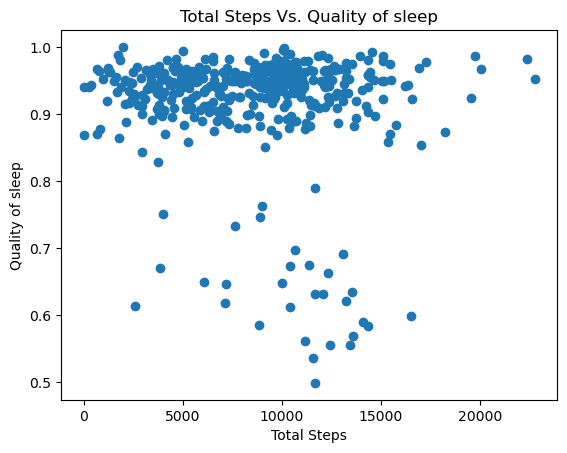

In [31]:
# scatter plot
x = clean_df['StepTotal']
y = clean_df['Quality of sleep']

plt.scatter(x, y, marker="o")

plt.xlabel('Total Steps')
plt.ylabel('Quality of sleep')
plt.title('Total Steps Vs. Quality of sleep')

plt.show()


In [32]:
# looking at the average
average_sleep_quality = clean_df.groupby(['Id']).mean()['Quality of sleep']
average_steps = clean_df.groupby(['Id']).mean()['StepTotal']

In [33]:
average_sleep_steps_df = average_sleep_quality.to_frame()
average_sleep_steps_df['Average Steps'] = average_steps
average_sleep_steps_df = average_sleep_steps_df.rename(columns={'Quality of sleep':'Average Quality of sleep'})
average_sleep_steps_df

,Average Quality of sleep,Average Steps
Id,,
1503960366,0.936385,12405.680000
1644430081,0.882040,7967.750000
1844505072,0.678460,3477.000000
1927972279,0.947008,1490.000000
2026352035,0.941341,5618.678571
2320127002,0.884058,5079.000000
2347167796,0.910370,8533.200000
3977333714,0.633669,11218.000000
4020332650,0.930358,6596.750000


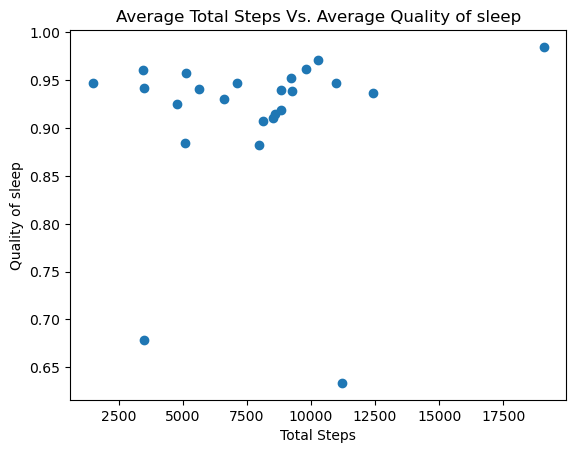

In [34]:
x = average_sleep_steps_df['Average Steps']
y = average_sleep_steps_df['Average Quality of sleep']

plt.scatter(x, y, marker="o")

plt.xlabel('Total Steps')
plt.ylabel('Quality of sleep')
plt.title('Average Total Steps Vs. Average Quality of sleep')

plt.show()

In [35]:
# randomly pick a person to look at
ID_list = clean_df['Id'].tolist()
random_ID = random.choice(ID_list)

In [36]:
# new dataframe for the selected id
random_person_df = clean_df[(clean_df['Id']==random_ID)]
random_person_df

,Id,Day,StepTotal,Quality of sleep
569,5577150313,2016-04-12,8135,0.956621
570,5577150313,2016-04-13,5077,0.943231
571,5577150313,2016-04-14,8596,0.959759
572,5577150313,2016-04-15,12087,0.949153
573,5577150313,2016-04-16,14269,0.912360
574,5577150313,2016-04-17,12231,0.941681
575,5577150313,2016-04-18,9893,0.952984
576,5577150313,2016-04-19,12574,0.965591
577,5577150313,2016-04-20,8330,0.931250
578,5577150313,2016-04-21,10830,0.947368


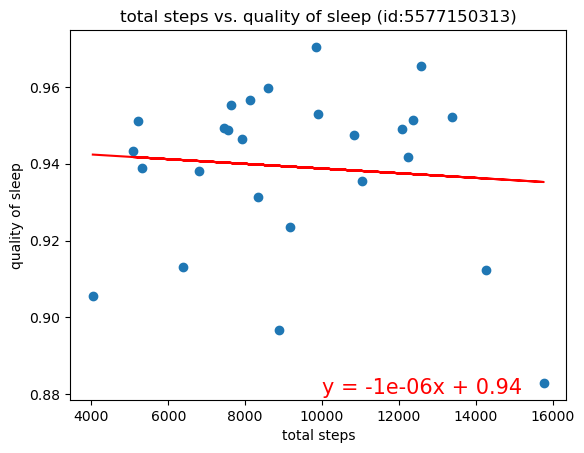

In [37]:
# how this person has been sleeping in a month

x_value = random_person_df['StepTotal']
y_value = random_person_df['Quality of sleep']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")

plt.annotate(line_eq,(10000,0.88),fontsize=15,color="red")

plt.xlabel('total steps')
plt.ylabel('quality of sleep')
plt.title(f'total steps vs. quality of sleep (id:{random_ID})')

plt.show()